# Predicting Hotel Booking Cancellations Using Machine Learning

## Problem Statement : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,5)
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/TT129/Desktop/Hotel Project/bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Exploratory Data Analysis (EDA)

1.  Top 10 countries of origin of Hotel visitors (Guests)
2.  Which month is the most busiest with bookings in the Hotel
3.  How many bookings were cancelled
4.  Which month has highest number of cancellations
5.  How many bookings were cancelled every month by Hotel Type
6.  Relationship between ADR and Arrival month by booking cancellation status 
7.  Total number of bookings for each hotel
8.  Total number of bookings by Market Segment
9.  Total number of bookings by Customer type
10. Arrival_date_year vs lead_time with booking cancellation status.
11. Total Number of Special requests 
12. Relationship between total special requests and cancellations
13. Total nights spent at Hotels by Market Segment and Hotel Type
14. How does the Price Per Night (ADR) Vary Over the Year by Hotel Type
15. What is the effect of repeated guest on Cancellations
16. Total Number of bookings by deposit type
17. What is the Effect of deposit type on Cancellations
18. What is the Effect of Meal type on Cancellations
19. What is the Effect of required_car_parking_spaces on Cancellations
20. What is the Effect of booking changes (Modifications) on Cancellations

## EDA : Data Visualisation

### 1. Top 10 countries of origin of Hotel visitors (Guests)

In [5]:
df['country'].value_counts(normalize = True)[:10]

PRT    0.408656
GBR    0.102008
FRA    0.087593
ESP    0.072059
DEU    0.061286
ITA    0.031673
IRL    0.028385
BEL    0.019697
BRA    0.018704
NLD    0.017695
Name: country, dtype: float64

Text(0, 0.5, 'Reservation Count')

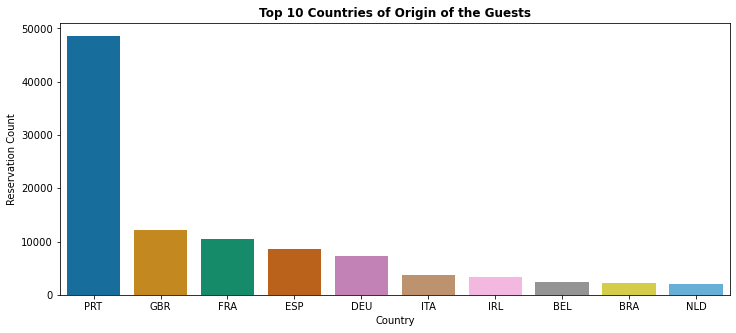

In [6]:
sns.countplot(x='country', data=df,order=pd.value_counts(df['country']).iloc[:10].index,palette= 'colorblind')
plt.title('Top 10 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Reservation Count')

- **The Above graph depicts information about the countries of origin of guests where the bookings were created.**
- **About 40% of all bookings are created from Portugal followed by Great Britain(10%) & France(8%)**

### 2. Which Month is the Most Occupied (Busiest) with Bookings at the Hotel

In [7]:
df['arrival_date_month'].value_counts(normalize = True)

August       0.116233
July         0.106047
May          0.098760
October      0.093475
April        0.092880
June         0.091624
September    0.088014
March        0.082034
February     0.067577
November     0.056906
December     0.056789
January      0.049661
Name: arrival_date_month, dtype: float64

Text(0, 0.5, 'Reservation Count')

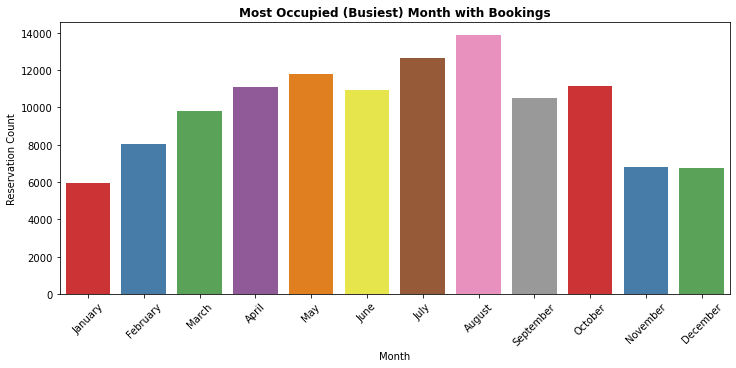

In [8]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.countplot(x='arrival_date_month', data = df,palette= 'Set1')
plt.title('Most Occupied (Busiest) Month with Bookings', weight='bold')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Reservation Count')

- **The above graph depicts the number of bookings created for each month.**
- <b>According to the graph, August is the most occupied (busiest) month with 11.62% bookings and January is the most unoccupied month with 4.96% bookings.

### 3. How many Bookings were Cancelled at the Hotel

In [9]:
df['is_canceled'].value_counts(normalize = True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

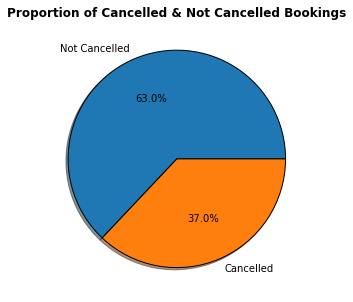

In [10]:
proportion = df['is_canceled'].value_counts()
labels = ['Not Cancelled','Cancelled']
plt.title('Proportion of Cancelled & Not Cancelled Bookings',weight = 'bold')
plt.pie(proportion,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'})
plt.show()

- **The above pie chart depicts proportion or percentage of cancelled & Not cancelled bookings.**
- <b>According to the pie chart, 63% bookings were not cancelled and 37% of the bookings were cancelled at the Hotel.

### 4.  Which Month has Highest Number of Cancellations By Hotel Type

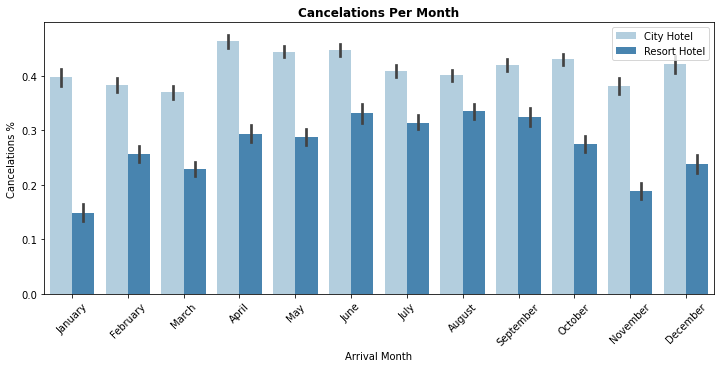

In [11]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.barplot(x = "arrival_date_month", y = "is_canceled", hue="hotel",hue_order = ["City Hotel", "Resort Hotel"],data=df,palette= 'Blues')
plt.title("Cancelations Per Month", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Cancelations %")
plt.legend(loc="upper right")
plt.show()

- **For the City hotel the  number of cancelations per month is around 40 % throughout the year.**
- **For the Resort hotel, the cancellations are highest in the summer (June,July, August) and lowest during the winter (November,December,January). In short, the possibility of cancellation for resort hotels in winter is very low.**

### 5. How many Bookings were Cancelled by Hotel Type

In [12]:
df.groupby('is_canceled')['hotel'].value_counts(normalize = True)

is_canceled  hotel       
0            City Hotel      0.615012
             Resort Hotel    0.384988
1            City Hotel      0.748508
             Resort Hotel    0.251492
Name: hotel, dtype: float64

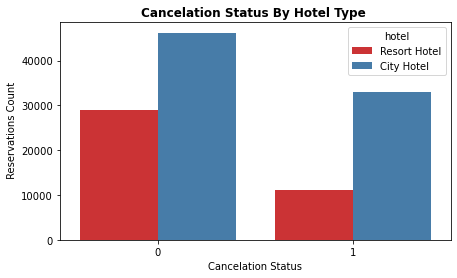

In [13]:
plt.figure(figsize = (7,4))
sns.countplot(x= 'is_canceled',data = df,hue = 'hotel',palette= 'Set1')
plt.title("Cancelation Status By Hotel Type ", weight = 'bold')
plt.xlabel("Cancelation Status")
plt.ylabel(" Reservations Count")
plt.show()

- **For the Resort Hotel, total of 25.14% Bookings were cancelled**
- **For the City Hotel, total of 74.85% Bookings were cancelled**

### 6.  Relationship between Average Daily Rate(ADR) and Arrival Month by Booking cancellation status

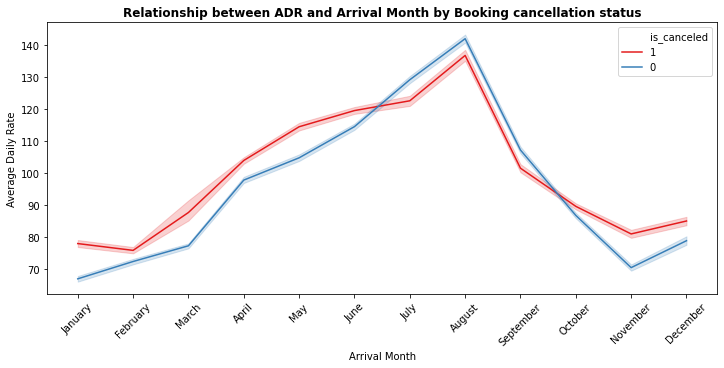

In [14]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.lineplot(x = "arrival_date_month", y = "adr", hue="is_canceled",hue_order= [1,0],data=df,palette= 'Set1')
plt.title("Relationship between ADR and Arrival Month by Booking cancellation status", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Average Daily Rate")
plt.legend(loc="upper right")
plt.show()

- **The above line chart depicts arrival month "August" is the most occupied (Busiest) month of bookings.** 
- **The highest Arrival Daily Rate (ADR) has been occurred in same August month.** 
- **Due to Highest ADR in August may be it could be one of the reasons for more canceled bookings in August.**

### 7. Total Number of Bookings for Each Hotel

In [15]:
df['hotel'].value_counts(normalize = True)

City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64

Text(0, 0.5, 'Reservation Count')

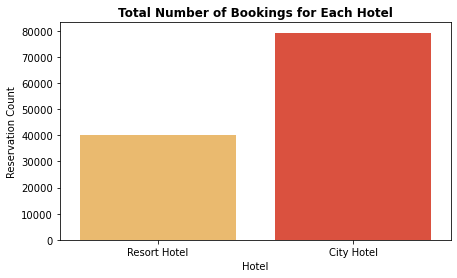

In [16]:
plt.figure(figsize = (7,4))
sns.countplot(x='hotel', data = df, palette='YlOrRd')
plt.title('Total Number of Bookings for Each Hotel', weight='bold')
plt.xlabel('Hotel')
plt.ylabel('Reservation Count')

- **The above graph depicts that approximately 34% of the reservations were booked for Resort hotel and 66% were booked for City Hotel.**

### 8. Total  Number of Bookings by Market Segment

In [17]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

Text(0, 0.5, 'Reservation Count')

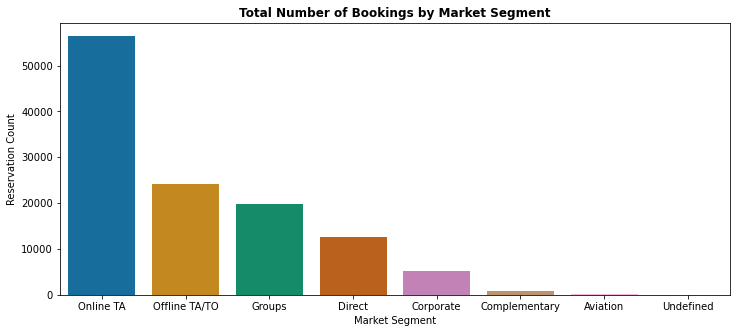

In [18]:
sns.countplot(df['market_segment'], palette='colorblind',order=pd.value_counts(df['market_segment']).index)
plt.title('Total Number of Bookings by Market Segment', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Reservation Count')

- **The above graph depicts that 47.3% of bookings are made via Online Travel Agents**
- **Around 20% of bookings are made via Offline Travel Agents.**
- **Less than 20% of bookings made directly without any agents**

### 9. Total Number of Bookings by Customer Type

In [19]:
df['customer_type'].value_counts(normalize = True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

Text(0, 0.5, 'Reservation Count')

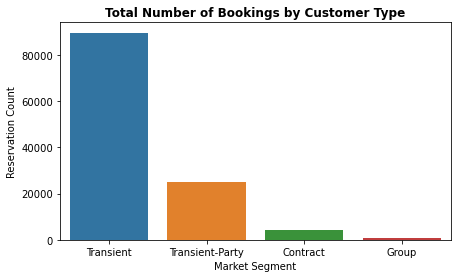

In [20]:
plt.figure(figsize= (7,4))
sns.countplot(df['customer_type'],order=pd.value_counts(df['customer_type']).index)
plt.title('Total Number of Bookings by Customer Type',weight = 'bold')
plt.xlabel('Market Segment')
plt.ylabel('Reservation Count')

- **The above graph depicts that 75% of bookings were Transient Bookings, 21% bookings were Transient_Party bookings.**
- **Around 3% bookings were contract bookings.**

### 10. Arrival Date Year vs Lead Time By Booking Cancellation Status

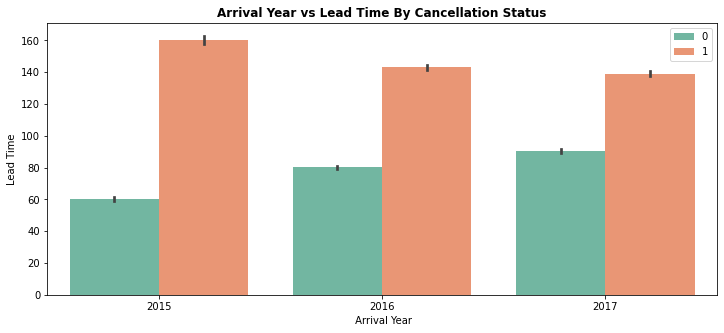

In [21]:
sns.barplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=df, palette="Set2")
plt.title('Arrival Year vs Lead Time By Cancellation Status', weight='bold')
plt.xlabel(' Arrival Year')
plt.ylabel('Lead Time')
plt.legend(loc = "upper right")

- **For all the 3 years, bookings with lead time less than 100 days has less chances of getting cancelled**
- **For all the 3 years, bookings with lead time more than 100 days has more chances of getting cancelled**

### 11. Exploring Number of Special Requests

In [22]:
df['total_of_special_requests'].value_counts(normalize = True)

0    0.588977
1    0.278298
2    0.108627
3    0.020915
4    0.002848
5    0.000335
Name: total_of_special_requests, dtype: float64

Text(0, 0.5, 'Count')

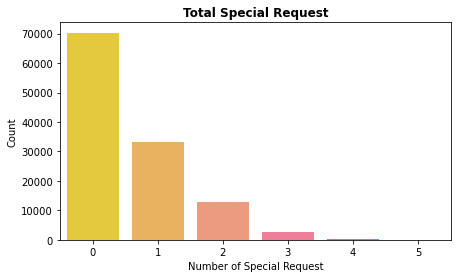

In [23]:
plt.figure(figsize = (7,4))
sns.countplot(x='total_of_special_requests', data=df, palette = 'spring_r')
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request')
plt.ylabel('Count')

- **From the above graph we can depict that around 58.8% bookings do not have any special requests from the guests**

### 12. Relationship between Special Requests and Cancellations

In [24]:
pd.crosstab(df['is_canceled'],df['total_of_special_requests'],normalize= True)

total_of_special_requests,0,1,2,3,4,5
is_canceled,,,,,,
0,0.307915,0.217003,0.084622,0.017179,0.002546,0.000318
1,0.281062,0.061295,0.024005,0.003736,0.000302,0.000017


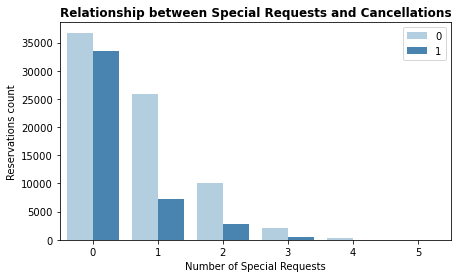

In [25]:
plt.figure(figsize = (7,4))
sns.countplot(x = "total_of_special_requests", hue = "is_canceled",data=df,palette= 'Blues')
plt.title("Relationship between Special Requests and Cancellations", weight = 'bold')
plt.xlabel("Number of Special Requests")
plt.ylabel("Reservations count")
plt.legend(loc="upper right")
plt.show()

- **The Above graph depicts the relationship between total number of special requests and cancellation booking status.**
- **Around 28% of bookings were cancelled with no special requests from the guests followed by 6% bookings were cancelled with one special requests from the guests.**

### 13.Total Nights Spent by Guests at the Hotel by Market Segment and Hotel Type 

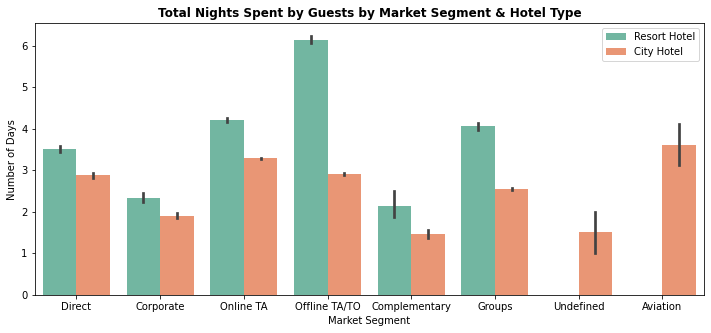

In [26]:
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights'] 
sns.barplot(x = "market_segment", y = "total_stay", data = df, hue = "hotel", palette = 'Set2')
plt.title('Total Nights Spent by Guests by Market Segment & Hotel Type', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Number of Days')
plt.legend(loc = "upper right")

- **For City hotel, most of guests prefer to stay between 1-4 nights.**
- **For Resort hotel, most of the guests prefer to stay more than 3 nights. It is obvious that when guests go to resort hotels, they prefer to stay for longer days.**
- **Guests from Aviation Segment do not seem to be staying at the Resort hotels**

### 14. How does the Price Per Night (ADR) Vary Over the Year by Hotel Type

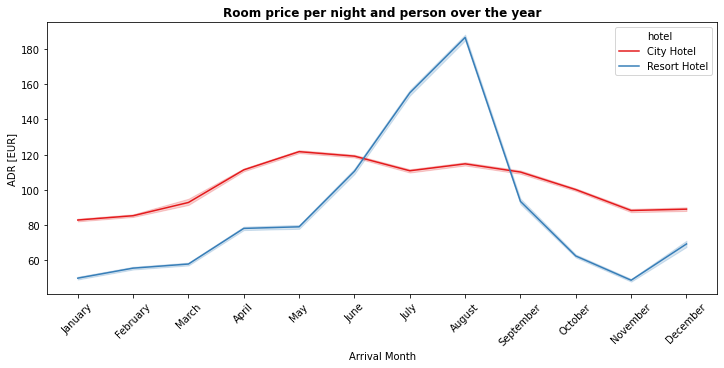

In [27]:
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=df, hue_order = ["City Hotel", "Resort Hotel"],palette= 'Set1')
plt.title("Room price per night and person over the year", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("ADR [EUR]")
plt.show()

- **For Resort Hotel, the price per night (ADR) is more expensive during July, August & September**
- **For City Hotel, the price per night (ADR) is slightly more during March, April & May**

### 15.  What is the effect of repeated guest on Cancellations

In [28]:
pd.crosstab(df['is_repeated_guest'],df['is_canceled'],normalize=True)

is_canceled,0,1
is_repeated_guest,,
0,0.602295,0.365793
1,0.027289,0.004624


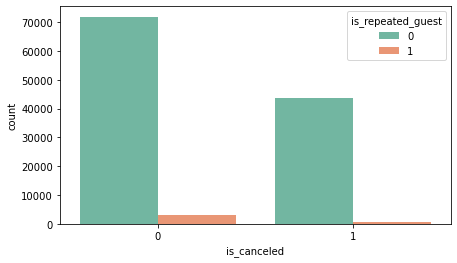

In [29]:
plt.figure(figsize=(7,4))
sns.countplot(x= 'is_canceled',hue = 'is_repeated_guest',data = df,palette= 'Set2')

- **From the above graph, we can depict that most of the repeated guests do not cancel their reservations and its obvious.**

### 16. Total Number of bookings by deposit type

In [30]:
df['deposit_type'].value_counts(normalize = True)

No Deposit    0.876464
Non Refund    0.122179
Refundable    0.001357
Name: deposit_type, dtype: float64

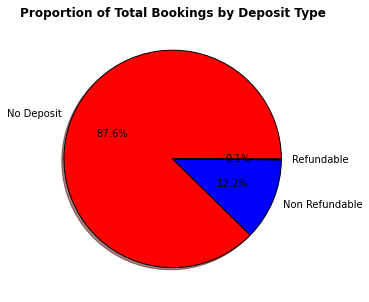

In [31]:
proportion = df['deposit_type'].value_counts()
labels = ['No Deposit','Non Refundable','Refundable']
plt.title('Proportion of Total Bookings by Deposit Type',weight = 'bold')
cols = ['red','blue','yellow']
plt.pie(proportion,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'},colors =cols)
plt.show()

- **Around 87.6% bookings are booked without deposit**
- **Around 12.2% bookings are booked with Non Refundable Policy**
- **Around 0.1% bookings are booked with Refundable Policy**

### 17. What is the Effect of Deposit Type on Cancellations

In [32]:
df.groupby('deposit_type')['is_canceled'].value_counts(normalize = True)

deposit_type  is_canceled
No Deposit    0              0.716230
              1              0.283770
Non Refund    1              0.993624
              0              0.006376
Refundable    0              0.777778
              1              0.222222
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

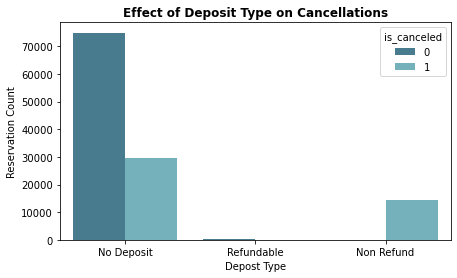

In [33]:
plt.figure(figsize=(7,4))
sns.countplot(x= 'deposit_type',hue = 'is_canceled',data = df,palette= 'GnBu_d')
plt.title('Effect of Deposit Type on Cancellations',weight = 'bold')
plt.xlabel('Depost Type')
plt.ylabel('Reservation Count')

- **Around 28% bookings were cancelled by guests with no deposit, followed by 22% bookings were cancelled which are with Refundable policy**
- **So its obvious that guests who do not pay any deposit while booking are likely to cancel more reservations**


### 18. What is the Effect of Meal type on Cancellations

In [34]:
df.groupby('meal')['is_canceled'].value_counts(normalize = True)

meal       is_canceled
BB         0              0.626151
           1              0.373849
FB         1              0.598997
           0              0.401003
HB         0              0.655397
           1              0.344603
SC         0              0.627606
           1              0.372394
Undefined  0              0.755346
           1              0.244654
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

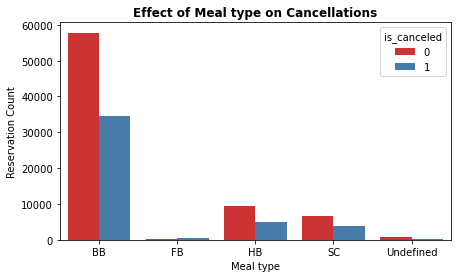

In [35]:
plt.figure(figsize=(7,4))
sns.countplot(x= 'meal',hue = 'is_canceled',data = df,palette= 'Set1')
plt.title ('Effect of Meal type on Cancellations',weight = 'bold')
plt.xlabel("Meal type")
plt.ylabel('Reservation Count')

- **From the graph we can depict that more number of reservations are booked by the guest for "Bed & Breakfast" meal type.**
- **Around 37% bookings of "BB"meal type were cancelled by the guests.**

### 19. What is the effect of Required_car_parking_spaces on Cancellations

In [36]:
df.groupby('required_car_parking_spaces')['is_canceled'].value_counts(normalize = True)

required_car_parking_spaces  is_canceled
0                            0              0.605051
                             1              0.394949
1                            0              1.000000
2                            0              1.000000
3                            0              1.000000
8                            0              1.000000
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

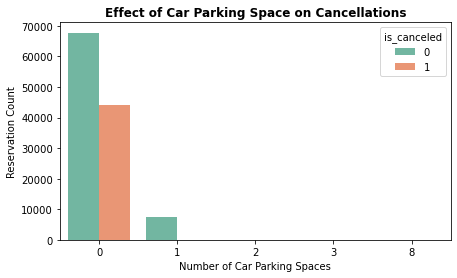

In [37]:
plt.figure(figsize=(7,4))
sns.countplot(x= 'required_car_parking_spaces',hue = 'is_canceled',data = df,palette= 'Set2')
plt.title ('Effect of Car Parking Space on Cancellations',weight = 'bold')
plt.xlabel("Number of Car Parking Spaces")
plt.ylabel('Reservation Count')

- **Around 40% bookings were cancelled by guests who didnt opt for Car parking at the time of booking**

### 20. What is the Effect of Booking Changes (Modifications) on Cancellations

In [38]:
df.groupby('booking_changes')['is_canceled'].value_counts(normalize = True)[:6]

booking_changes  is_canceled
0                0              0.591458
                 1              0.408542
1                0              0.857728
                 1              0.142272
2                0              0.798686
                 1              0.201314
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

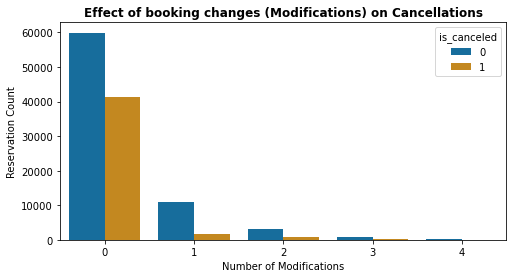

In [41]:
plt.figure(figsize=(8,4))
sns.countplot(x= 'booking_changes',order=pd.value_counts(df['booking_changes']).iloc[:5].index,hue = 'is_canceled',data = df,palette= 'colorblind')
plt.title ('Effect of booking changes (Modifications) on Cancellations',weight = 'bold')
plt.xlabel("Number of Modifications")
plt.ylabel('Reservation Count')

- **Around 40% of bookings were cancelled by the guests when no modifications done**
- **Around 14% of bookings were cancelled by the guests when one modificationsification was done**